# Valeurs manquantes et factorisation de matrices

Réflexion autour des valeur manquantes et de la factorisation de matrice positive.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Matrice à coefficients aléatoires

On étudie la factorisation d'une matrice à coefficients tout à fait aléatoires qui suivent une loi uniforme sur l'intervalle $[0,1]$. Essayons sur une petite matrice :

In [ ]:
from numpy.random import rand
M = rand(3, 3)
M

array([[ 0.26491777,  0.74038703,  0.21583309],
       [ 0.85534993,  0.55600586,  0.06962791],
       [ 0.27573567,  0.00661646,  0.57587144]])

In [ ]:
from sklearn.decomposition import NMF
mf = NMF(1)
mf.fit_transform(M)

array([[ 0.6519655 ],
       [ 0.87114073],
       [ 0.30643733]])

In [ ]:
mf.components_

array([[ 0.7843987 ,  0.75837885,  0.29568433]])

In [ ]:
mf.reconstruction_err_ / (M.shape[0] * M.shape[1])

0.005055960568122492

On recalcule l'erreur :

In [ ]:
d = M - mf.fit_transform(M) @ mf.components_
a = d.ravel()
e = a @ a.T
e ** 0.5 / (M.shape[0] * M.shape[1])

0.0050559605681224917

In [ ]:
e.ravel()

array([-0.24648312,  0.24595018,  0.0230571 ,  0.17202827, -0.10464885,
       -0.18795476,  0.03536663, -0.22577914,  0.48526272])

Et maintenant sur une grande et plus nécessairement carrée :

In [ ]:
M = rand(300, 10)
mf = NMF(1)
mf.fit_transform(M)
mf.reconstruction_err_ / (M.shape[0] * M.shape[1])

0.005055960568122492

L'erreur est la même :

In [ ]:
errs = []
rangs = list(range(1, 11))
for k in rangs:
    mf = NMF(k)
    mf.fit_transform(M)
    e = mf.reconstruction_err_ / (M.shape[0] * M.shape[1])
    errs.append(e)

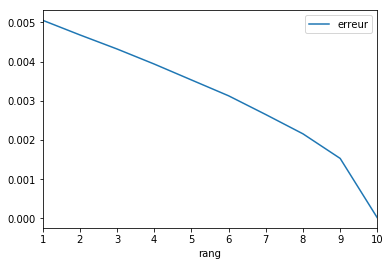

In [ ]:
import pandas
df = pandas.DataFrame(dict(rang=rangs, erreur=errs))
df.plot(x="rang", y="erreur")

## Matrice avec des vecteurs colonnes corrélés

Supposons maintenant que la matrice précédente $M$ est de rang 3. Pour s'en assurer, on tire une matrice aléalatoire avec 3 vecteurs colonnes et on réplique des colonnes jusqu'à la dimension souhaitée.

In [ ]:
from numpy import hstack
M = rand(300, 3)
M = hstack([M, M, M, M[:,:1]])
M.shape

(300, 10)

In [ ]:
errs = []
rangs = list(range(1, 11))
for k in rangs:
    mf = NMF(k)
    mf.fit_transform(M)
    e = mf.reconstruction_err_ / (M.shape[0] * M.shape[1])
    errs.append(e)

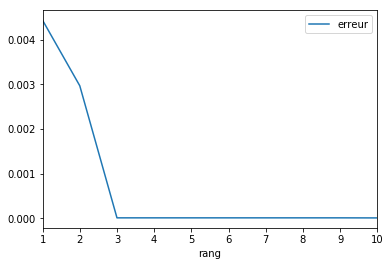

In [ ]:
import pandas
df = pandas.DataFrame(dict(rang=rangs, erreur=errs))
df.plot(x="rang", y="erreur")

On essaye à nouveausur une matrice un peu plus petite.

In [ ]:
M = rand(3, 2)
M = hstack([M, M[:,:1]])
M

array([[ 0.60124923,  0.47589803,  0.60124923],
       [ 0.44400499,  0.35837503,  0.44400499],
       [ 0.19814868,  0.89749978,  0.19814868]])

In [ ]:
mf = NMF(2)
mf.fit_transform(M)

array([[ 0.8472878 ,  0.        ],
       [ 0.62571482,  0.00980261],
       [ 0.27923658,  1.049712  ]])

In [ ]:
mf.components_

array([[ 0.70960923,  0.56167973,  0.70960923],
       [ 0.        ,  0.7055824 ,  0.        ]])

La dernière colonne est identique à la première.